## Time Series Analytics on Fintech Investments in Singapore

We aim to determine if FinTech is sustainable in Singapore in the long run. We will perform time series analysis on historical datasets, namely the number and value of FinTech investments in Singapore. 

<b>1.Value of fintech investments in Singapore from the first quarter of 2014 to the fourth quarter of 2019 (in million U.S. dollars)*</b>

This statistic represents the value of fintech investments in Singapore from the first quarter of 2013 to the fourth quarter of 2019. During the measured time period, the highest investment value in the fintech industry was recorded in the fourth quarter of 2018 amounting to approximately 218.1 million U.S. dollars

<i>KPMG. (February 19, 2020). Value of fintech investments in Singapore from the first quarter of 2014 to the fourth quarter of 2019 (in million U.S. dollars)* In Statista. Retrieved September 13, 2020, from https://www-statista-com.libproxy.smu.edu.sg/statistics/1010180/singapore-fintech-investments-value/</i>

<b>2.Number of fintech investment deals in Singapore from the first quarter of 2013 to the fourth quarter of 2018</b>

This statistic represents the number of fintech investment deals in Singapore from the first quarter of 2013 to the fourth quarter of 2018. During the measured time period, the highest number of fintech investment deals was recorded in the first quarter of 2018 with 19 deals.

<i>KPMG. (February 13, 2019). Number of fintech investment deals in Singapore from the first quarter of 2013 to the fourth quarter of 2018* [Graph]. In Statista. Retrieved September 13, 2020, from https://www-statista-com.libproxy.smu.edu.sg/statistics/1010235/singapore-number-of-fintech-investment-deals/</i>


### 1. Data Preprocessing

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")

In [2]:
# Reading in data 
df_value = pd.read_excel('Data.xlsx',sheet_name=0)   # Dataset for value of fintech investments in sg
df_number = pd.read_excel('Data.xlsx',sheet_name=1)  # Dataset for number of fintech investments in sg

### 1.1 Value of Fintech Investments in SG 

In [3]:
df_value

,Time,Value
0,Q1 2014,22.2
1,Q2 2014,4.0
2,Q3 2014,1.2
3,Q4 2014,2.0
4,Q1 2015,39.0
5,Q2 2015,26.2
6,Q3 2015,22.9
7,Q4 2015,117.2
8,Q1 2016,25.2
9,Q2 2016,17.1


#### Data cleaning and EDA

In [4]:
# Setting dates to proper format (dd/mm/yyyy)
df_value['Date'] = pd.date_range(start = '01/01/2014', end = '31/12/2019', freq = 'Q')

In [5]:
# Set Date as the index
df_value.set_index('Date',inplace=True)

In [6]:
df_value = df_value.drop(columns = ['Time'],axis=1)

In [7]:
# Checking for null values
df_value.isnull().sum()

Value    0
dtype: int64

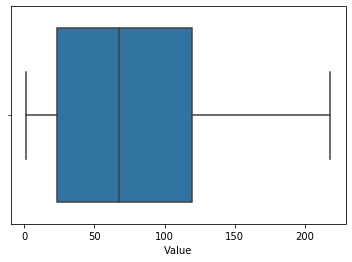

In [8]:
# Distribution of values
sns.boxplot(x=df_value['Value'])

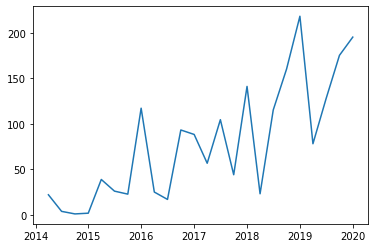

In [9]:
# value of fintech investment over time
plt.plot(df_value['Value'])

#### Time series analysis

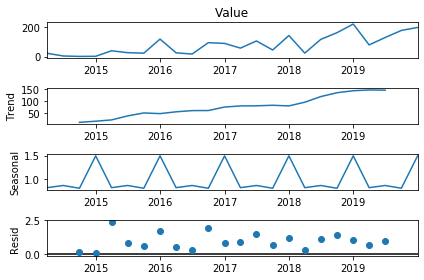

In [10]:
# seasonal decomposition into trend, season, and residual
seasonal_decompose(df_value['Value'], model='multiplicative').plot();

In [11]:
# Checking if data is stationary with Augmented Dickey-Fuller test 

def adf_test(series):

    print(f'Augmented Dickey-Fuller Test:')
    result = adfuller(series, autolag = 'AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4], index = labels)

    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
        
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
# Checking if dataset is stationary 
adf_test(df_value['Value'])

Augmented Dickey-Fuller Test:
ADF test statistic      -0.504501
p-value                  0.891135
# lags used              3.000000
# observations          20.000000
critical value (1%)     -3.809209
critical value (5%)     -3.021645
critical value (10%)    -2.650713
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


If we perform differencing on the data, it will be stationary, resulting in a lower p value.

### 1.2 Number of Fintech Investments in SG 

In [13]:
df_number

,Time,Number
0,Q1 2013,0
1,Q2 2013,3
2,Q3 2013,1
3,Q4 2013,8
4,Q1 2014,5
5,Q2 2014,4
6,Q3 2014,6
7,Q4 2014,5
8,Q1 2015,10
9,Q2 2015,4


#### Data cleaning and EDA

In [14]:
# Repeating the same steps for the other dataframe
df_number['Date'] = pd.date_range(start = '01/01/2013', end = '31/12/2018', freq = 'Q')

In [15]:
# Setting date as index 
df_number.set_index('Date',inplace=True)

In [16]:
df_number = df_number.drop(columns = ['Time'],axis=1)

In [17]:
# Checking for null values 
df_number.isnull().sum()

Number    0
dtype: int64

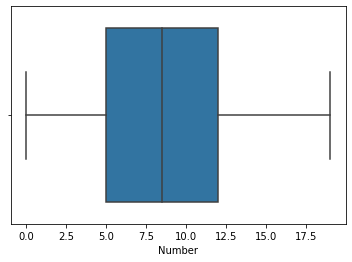

In [18]:
# Distribution of values
sns.boxplot(x=df_number['Number'])

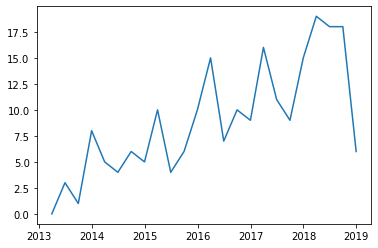

In [19]:
# number of fintech investment over time
plt.plot(df_number['Number'])

#### Time series analysis

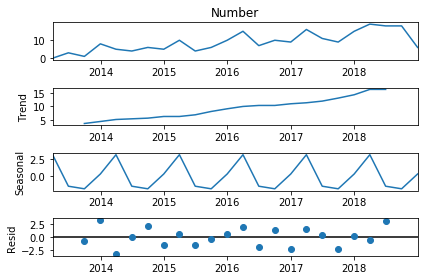

In [20]:
# seasonal decomposition into trend, season, and residual
seasonal_decompose(df_number['Number'], model='additive').plot();

In [21]:
adf_test(df_number['Number'])

Augmented Dickey-Fuller Test:
ADF test statistic       1.192592
p-value                  0.995934
# lags used              9.000000
# observations          14.000000
critical value (1%)     -4.012034
critical value (5%)     -3.104184
critical value (10%)    -2.690987
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### 2. Applying auto arima 

### 2.1 Forecasting the value of FinTech investments 

In [22]:
# Applying auto arima 

from pmdarima import auto_arima

auto_arima(df_value['Value'],seasonal = True, m = 4).summary() # m=4 since the seasonal cycle is every 4 data points

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                   24
Model:             SARIMAX(2, 1, [1], 4)   Log Likelihood                 -99.243
Date:                   Wed, 02 Sep 2020   AIC                            208.485
Time:                           01:21:24   BIC                            213.464
Sample:                                0   HQIC                           209.457
                                    - 24                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     87.4935     30.298      2.888      0.004      28.111     146.876
ar.S.L4       -1.3946      0.624     -2.235      0.025      -2.618      -0.172
ar.S.L8       -0.8092      0.318     -2.548      0.011      -1.432      -0.187
ma.S.L4        0.9906     55.188      0.018      0.986    -107.176     109.158
sigma2       680.1124   3.73e+04      0.018      0.985   -7.24e+04    7.37e+04
===================================================================================
Ljung-Box (Q):                       11.51   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.91   Prob(JB):                         0.75
Heteroskedasticity (H):               0.58   Skew:                            -0.27
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Fitting the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_value['Value'],order=(3,1,1))
results = model.fit()

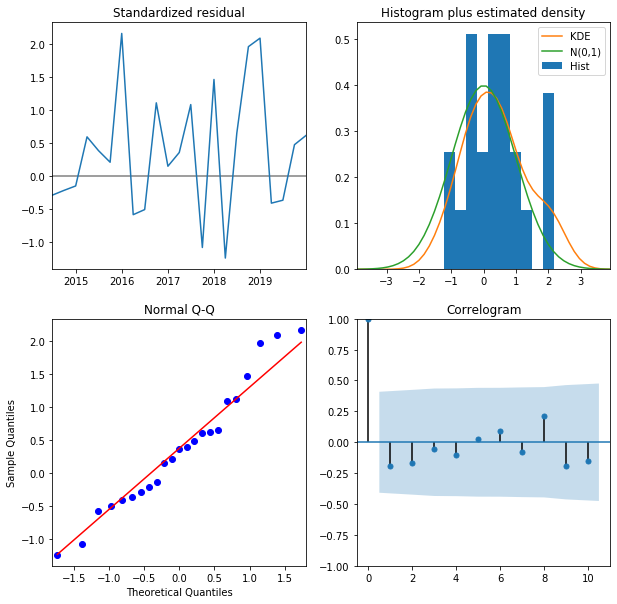

In [24]:
results.plot_diagnostics(figsize = (10,10));

In [25]:
start = len(df_value) - 4
end = start+8

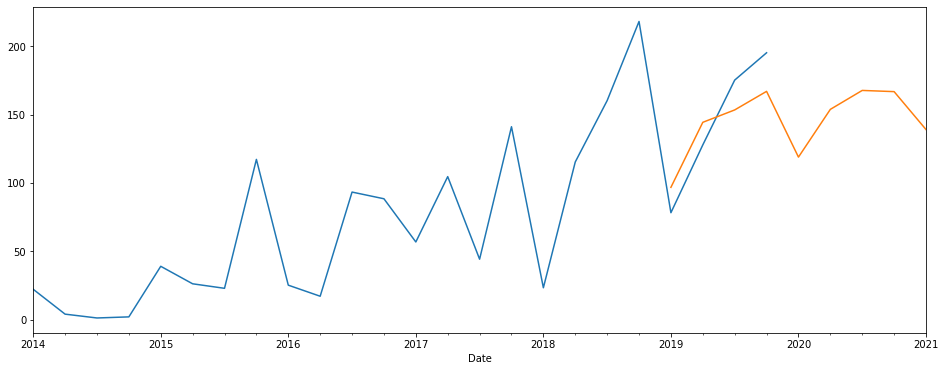

In [26]:
# Plotting predictions
predictions_value = results.predict(start=start, end=end)

plt.figure(figsize=(16,6))
df_value['Value'].plot()
predictions_value.plot()

In [27]:
# Root mean squared error 

sqrt(mean_squared_error(df_value['Value'][-4:].values, predictions_value[:4].values))

21.73953515430826

### 2.2 Forecasting the number of FinTech investments

In [28]:
from pmdarima import auto_arima

auto_arima(df_number['Number'],seasonal = True, m = 4).summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 4)   Log Likelihood                 -47.751
Date:                           Wed, 02 Sep 2020   AIC                            107.502
Time:                                   01:21:37   BIC                            113.477
Sample:                                        0   HQIC                           108.669
                                            - 24                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1734      3.169      1.317      0.188      -2.037      10.384
ar.L1          0.1857      0.563      0.330      0.742      -0.919       1.290
ma.L1         -0.9996    146.095     -0.007      0.995    -287.341     285.342
ar.S.L4       -0.9998      0.529     -1.889      0.059      -2.037       0.038
ma.S.L4        0.9781     36.781      0.027      0.979     -71.112      73.068
sigma2         3.9770    516.075      0.008      0.994   -1007.512    1015.466
===================================================================================
Ljung-Box (Q):                       15.78   Jarque-Bera (JB):                 9.24
Prob(Q):                              0.67   Prob(JB):                         0.01
Heteroskedasticity (H):               2.70   Skew:                             1.35
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Fitting the model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_number['Number'],order=(3,1,1))
results = model.fit()

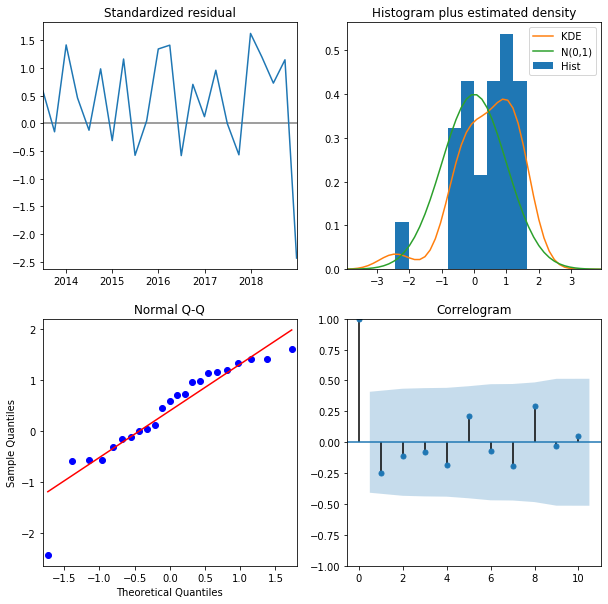

In [30]:
results.plot_diagnostics(figsize = (10,10));

In [31]:
start = len(df_value) - 4
end = start+8

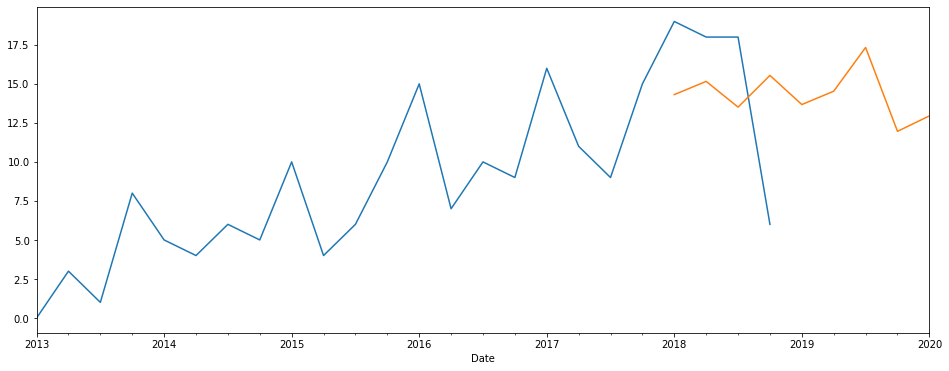

In [32]:
# Plotting predictions
predictions_number = results.predict(start=start, end=end)

plt.figure(figsize=(16,6))
df_number['Number'].plot()
predictions_number.plot()

In [33]:
# Root mean squared error 

sqrt(mean_squared_error(df_number['Number'][-4:].values, predictions_number[:4].values))

5.942337350352772

Based on our time series forecast, we can conclude that that the overall trend of the volume of fintech investments is seen to be increasing over the years, though volatile. This indicates the potential for the growth in the fintech industry.

We observe a dip in the value and number of fintech investments in singapore in the first quarter of every year. The forecast also shows the volatility of the volume of the fintech investments.

However, based on the limited historical data avaliable, we are unable to accurately forecast the volume of investments for many years to come. Our forecast is solely based on historical data. In reality, there are many other factors that influence fintech investments, such as national relations and politics. 

FinTech as an industry is very profitable due to the shift in the increasing advancement in technology in the world. To keep up with the trends, countries will have to continue developing their FinTech industry. Based on our analysis, Singapore has been keeping up in this aspect. 

- Done by: Denyse, Tung Yuen